In [2]:
import os
#from essentia import *
#from essentia.standard import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import get_window
import soundfile as sf
import urllib.request
from IPython.display import Audio
#import crepe
import pandas as pd
import pretty_midi
import librosa

### D#
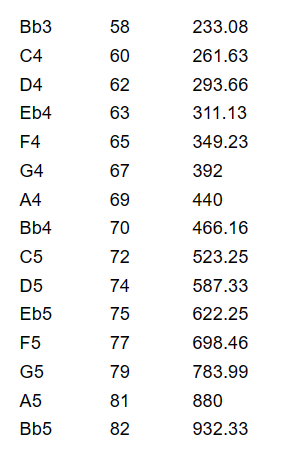

E
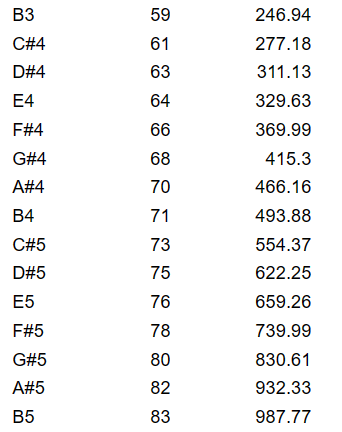

In [66]:
plt.rcParams["figure.figsize"] = [14, 4]
plt.rcParams["figure.autolayout"] = True

interval_duration = 0.125
#interval_duration = 0.0625
threshold_norm = 0.05
midi_threshold = 58
eps = 1e-7

# Alap: E
# AudioSource, Flute: D#
my_midis_Dsharp = [58, 60, 62, 63, 65, 67, 69, 70, 72, 74, 75, 77, 79, 81, 82,0] 
my_notes_Dsharp = ["Bb3", "C4", "D4", "Eb4","F4", "G4", "A4", "Bb4", "C5", "D5", "Eb5", "F5", "G5", "A5", "Bb5","NaN"]


my_midis_E = [59, 61, 63, 64, 66, 68, 70, 71, 73, 75, 76, 78, 80, 82, 83,0] 
my_notes_E = ["B3", "Db4", "Eb4", "E4","Gb4", "Ab4", "Bb4", "B4", "Db5", "Eb5", "E5", "Gb5", "Ab5", "Bb5", "B5","NaN"]
my_midis = my_midis_Dsharp
my_notes = my_notes_Dsharp

In [67]:
midi_notes = [my_midis , my_notes]
midi_notes_df = pd.DataFrame (midi_notes).transpose()
midi_notes_df.columns = ['Midi', 'Note']
midi_notes_df

,Midi,Note
0,58,Bb3
1,60,C4
2,62,D4
3,63,Eb4
4,65,F4
5,67,G4
6,69,A4
7,70,Bb4
8,72,C5
9,74,D5


In [5]:
audio_file = "ron_mono_protools.wav"

x_in, fs = sf.read(audio_file)

In [6]:
x_in.shape

(46569600,)

In [ ]:
'''
# Convert tp mono
xx = (x_in[:,0] + x_in[:,1])/2
xx.shape
'''

Sampling Frequency is:  44100
Length of the signal is 1056.0  seconds


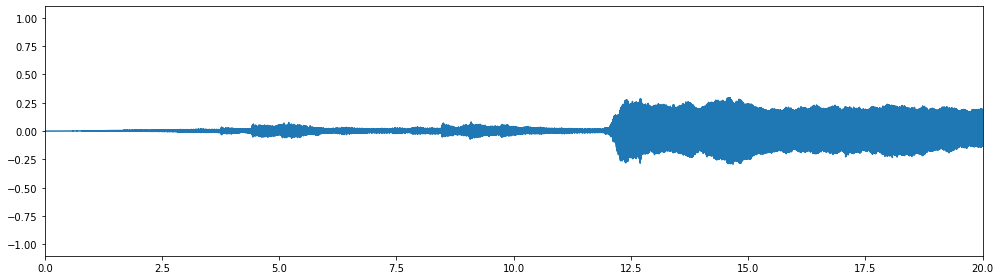

In [7]:


'''
# Convert stereo to mono
if (x_in.shape[1]==2):
    x_left = x_in[:,0]
    x_rigth = x_in[:,0]
    x = (x_left + x_rigth)/2
else:
    x = x_in
''' 

#x = np.float32(x_in[0:300*44100])
x = np.float32(x_in)
print("Sampling Frequency is: ", fs)
print("Length of the signal is", len(x)/fs ," seconds")

#plt.figure(figsize=(18,6))
time_s32 = np.linspace(0, len(x)/fs, len(x))
time_s = np.float32(time_s32)
time_s32.dtype
plt.plot(time_s, x)
plt.xlim(0, 20);

In [8]:
x = x-np.average(x)
xmax = max(x)
xnorm = x/xmax
for i in range(len(xnorm)):
    if np.abs(xnorm[i])<threshold_norm:
        xnorm[i] = 0



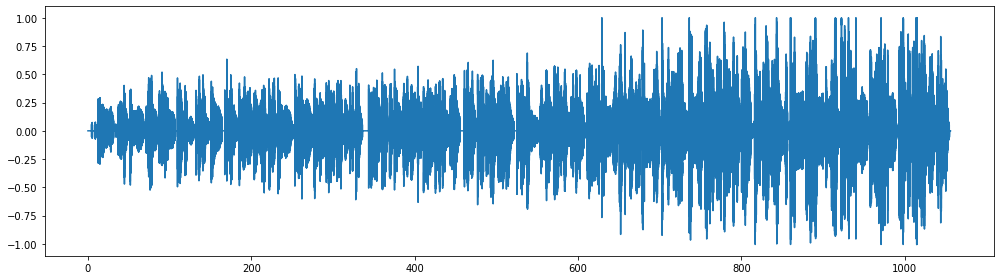

In [29]:
#plt.figure(figsize=(18,6))
plt.plot(time_s,xnorm);
#plt.xlim(0, 100);

In [9]:
#est_freq_yin = librosa.yin(xnorm, fmin=55, fmax=1760, sr=fs, frame_length=2048, hop_length=196)
#est_time_yin = librosa.times_like(est_freq_yin,  sr=fs)
#est_freq_pyin , voiced_flag, voiced_probs = librosa.pyin(xnorm, fmin=55, fmax=1760, sr=fs,hop_length=196, frame_length=2048)
#est_time_pyin = librosa.times_like(est_freq_pyin,  sr=fs)

In [30]:
sv_freq_df = pd.read_csv("AudioSource_Essentia.csv",header=None)
sv_freq_df = sv_freq_df.rename(columns={0: "Time", 1: "Frequency"})
est_time_sv = sv_freq_df["Time"].to_numpy()
est_freq_sv = sv_freq_df["Frequency"].to_numpy()

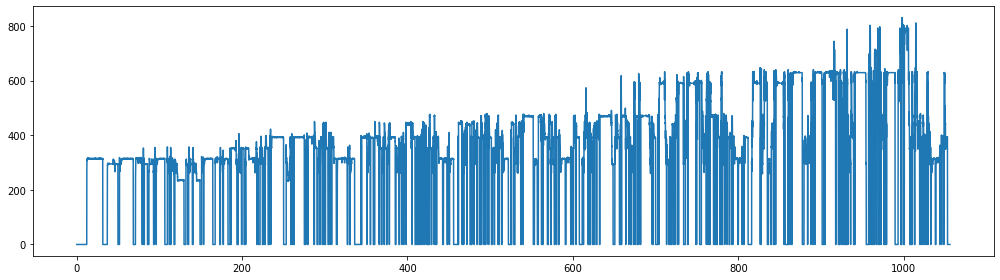

In [68]:
plt.plot(est_time_sv, est_freq_sv);

In [11]:
#est_freq_wneg_sv = est_freq_sv

In [12]:
#for i in range(len(sv_freq_df)):
#    if est_freq_wneg_sv[i]<0:
#        est_freq_wneg_sv[i]= 0

#plt.plot(est_freq_wneg_sv)


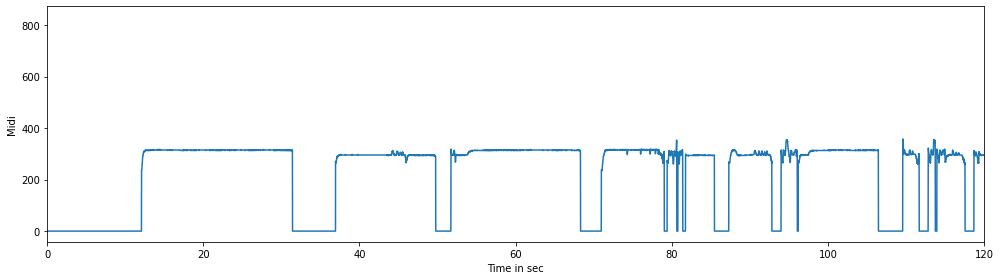

In [69]:
plt.plot(est_time_sv,est_freq_sv);
plt.xlim(0, 120)
plt.xlabel("Time in sec")
plt.ylabel("Midi");

In [70]:
sec_count = interval_duration
start_index = 0
start_idx = []
end_idx = []
for i in range(len(est_time_sv)):
    if est_time_sv[i]>=sec_count:
        end_index = i-1
        start_idx.append(start_index)
        end_idx.append(end_index)
        sec_count+=interval_duration
        start_index = end_index+1

frequency_avg_perinterval_sv = []
frequency_med_perinterval_sv = []
time_intervals_sv = []
for i in range(len(start_idx)):
    avg_frequency_sv = np.average(est_freq_sv[start_idx[i]:end_idx[i]])
    med_frequency_sv = np.median(est_freq_sv[start_idx[i]:end_idx[i]])
    frequency_avg_perinterval_sv.append(avg_frequency_sv)
    frequency_med_perinterval_sv.append(med_frequency_sv)
    time_intervals_sv.append(i*interval_duration)  

In [71]:
midi_avg_perinterval_sv = []
#midi_med_perinterval_sv = []

sec_count = interval_duration
start_index = 0
start_idx = []
end_idx = []
for i in range(len(est_time_sv)):
    if est_time_sv[i]>=sec_count:
        end_index = i-1
        start_idx.append(start_index)
        end_idx.append(end_index)
        sec_count+=interval_duration
        start_index = end_index+1

frequency_avg_perinterval_sv = []
#frequency_med_perinterval_sv = []
time_intervals_sv = []
for i in range(len(start_idx)):
    avg_frequency_sv = np.average(est_freq_sv[start_idx[i]:end_idx[i]])
    #med_frequency_sv = np.median(est_freq_sv[start_idx[i]:end_idx[i]])
    frequency_avg_perinterval_sv.append(avg_frequency_sv)
    #frequency_med_perinterval_sv.append(med_frequency_sv)

    midi_sv_raw = 12 * np.log2(avg_frequency_sv/440+eps) + 69
    midi_sv = round(midi_sv_raw)
    
    #print(midi_sv)
    
    if midi_sv>my_midis[-2:][0]:
        #midi_avg_perinterval_sv.append(my_midis[-1:][0])
        midi_avg_perinterval_sv.append(0)
    elif midi_sv<midi_threshold:
        midi_avg_perinterval_sv.append(0)
    elif (midi_sv in my_midis): 
        midi_avg_perinterval_sv.append(midi_sv)
    elif (midi_sv-midi_sv_raw)>0:
        #print(midi_melodia_raw, "    Less than 0.5", np.floor(midi_melodia_raw) )  
        midi_avg_perinterval_sv.append(np.floor(midi_sv_raw)) 
    else:
        #print(midi_melodia_raw, "    Bigger than 0.5", np.ceil(midi_melodia_raw) )
        midi_avg_perinterval_sv.append(np.ceil(midi_sv_raw)) 

    #midi_sv_raw = 12 * np.log2(med_frequency_sv/440+eps) + 69
    #midi_sv = round(midi_sv_raw)

    #if midi_sv>my_midis[-2:][0]:
        #midi_med_perinterval_sv.append(my_midis[-1:][0])
    #    midi_med_perinterval_sv.append(0)
    #elif midi_sv<midi_threshold:
    #    midi_med_perinterval_sv.append(0)
    #elif (midi_sv in my_midis): 
    #    midi_med_perinterval_sv.append(midi_sv)
    #elif (midi_sv-midi_sv_raw)>0:
    #print(midi_melodia_raw, "    Less than 0.5", np.floor(midi_melodia_raw) )  
    #    midi_med_perinterval_sv.append(np.floor(midi_sv_raw)) 
    #else:
    #print(midi_melodia_raw, "    Bigger than 0.5", np.ceil(midi_melodia_raw) )
    #    midi_med_perinterval_sv.append(np.ceil(midi_sv_raw))

    time_intervals_sv.append(i*interval_duration)

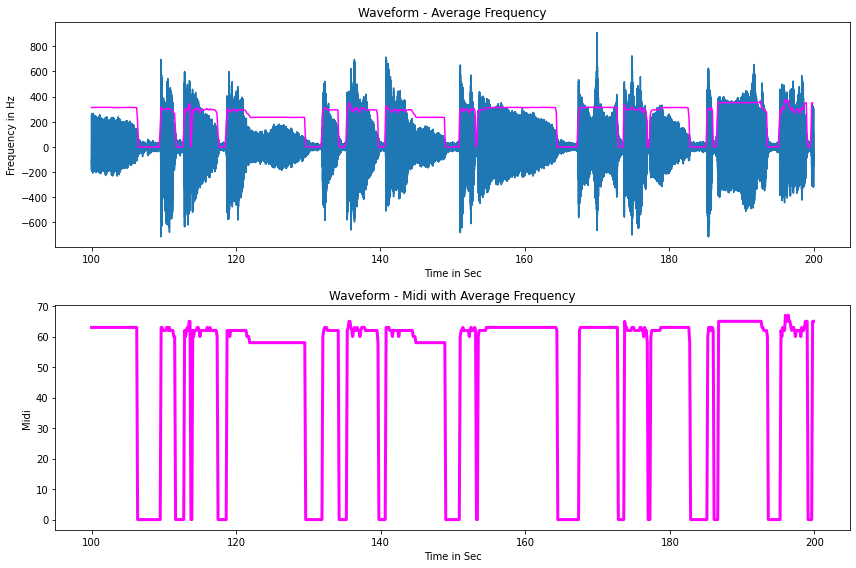

In [72]:
start_time = 100
end_time = 200
sampling = 10
time_ss = np.arange(0,len(time_s),sampling)

plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]/fs, 1500*x[time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]])
plt.title("Waveform - Average Frequency")
plt.xlabel("Time in Sec")
plt.ylabel("Frequency in Hz")

plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), frequency_avg_perinterval_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="magenta");

plt.subplot(2,1,2)
#plt.plot(time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]/fs, 120*x[time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]])
plt.title("Waveform - Midi with Average Frequency")
plt.xlabel("Time in Sec")
plt.ylabel("Midi")
plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), midi_avg_perinterval_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="magenta", linewidth=3);
#plt.ylim(0, 80);

In [73]:
data_to_be_written_sv = [time_intervals_sv , midi_avg_perinterval_sv]
sv_df = pd.DataFrame (data_to_be_written_sv).transpose()
sv_df.columns = ['Time', 'Midi']

sv_time = sv_df.Time
sv_midi = sv_df.Midi

In [74]:
sv_df.to_csv("AudioSource_MIDI.csv", index=False)

In [75]:
midi_notes = []
time_start = []

midi_notes.append(sv_df.Midi[0])
time_start.append(sv_df.Time[0])


for i in range(len(sv_df)-1):
    if sv_df.Midi[i+1]!=sv_df.Midi[i]:
        midi_notes.append(int(sv_df.Midi[i+1]))
        time_start.append(sv_df.Time[i+1])  


df_sv_midi = pd.DataFrame([time_start,midi_notes]).transpose()
df_sv_midi.columns = ['Start', 'Midi']
df_sv_midi["Midi"] = df_sv_midi["Midi"].astype(int)        

In [39]:
df_sv_midi[0:10]

,Start,Midi
0,0.0000,0
1,12.1250,58
2,12.1875,62
3,12.3125,63
4,31.3750,58
5,31.4375,0
6,36.9375,60
7,37.0625,62
8,44.1875,63
9,44.3750,62


In [76]:
# Create a PrettyMIDI object
my_tempo = int(60/interval_duration/4)
cello_c_chord_sv = pretty_midi.PrettyMIDI(initial_tempo=my_tempo)



# Create an Instrument instance for a cello instrument
cello_program_sv = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program_sv)


for i in range(len(df_sv_midi)-1):
#for i in range(356):
    if(df_sv_midi.Midi[i]>20):
        note = pretty_midi.Note(velocity=50, pitch=df_sv_midi.Midi[i], start=df_sv_midi.Start[i], end=df_sv_midi.Start[i+1])
        #print(df_sv_midi.Midi[i], df_sv_midi.Start[i], df_sv_midi.Start[i+1])
        
        #print("I:", i, note)
        cello.notes.append(note)
    

cello_c_chord_sv.instruments.append(cello)

cello_c_chord_sv.write('AudioSource_Essentia_converted.mid')

In [77]:
sv_df["MidiYes"] = sv_df["Midi"]
sv_df["MidiYesDiff"] = sv_df["Midi"]

In [78]:
for i in range(len(sv_df)):
    if(sv_df.Midi[i]>0):
        sv_df["MidiYes"][i] = 1    
        
for i in range(1,len(sv_df)):
    sv_df.MidiYesDiff[i] =  sv_df.MidiYes[i] - sv_df.MidiYes[i-1]   
    

In [79]:
zeroends_sv = sv_df[sv_df.MidiYesDiff==1]["Time"]

In [80]:
df_sv_nonzeros = df_sv_midi[df_sv_midi.Midi!=0]
df_sv_nonzeros = df_sv_nonzeros.reset_index(drop=True)
df_sv_zeros = df_sv_midi[df_sv_midi.Midi==0]
df_sv_zeros = df_sv_zeros.reset_index(drop=True)


In [81]:
zeros_start = []
zeros_ends = []
for i in range(len(zeroends_sv)):
    zeros_start.append(df_sv_zeros.Start[i])
    zeros_ends.append(np.array(zeroends_sv)[i]-interval_duration)
    
zeros_start.append(df_sv_zeros.Start[-1:].item()) 
zeros_ends.append(sv_df.Time[-1:].item())

zero_segments_sv = pd.DataFrame ([zeros_start , zeros_ends , list(np.subtract(np.array(zeros_ends), np.array(zeros_start))) ]).transpose()
zero_segments_sv.columns = ['Start', 'End', "Duration"]


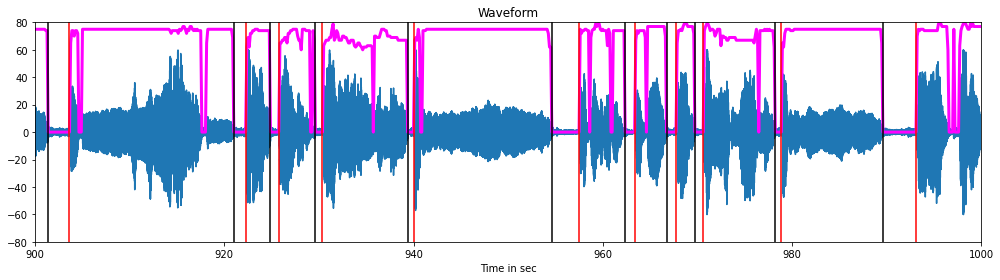

In [82]:
zero_segment_threshold = 0.5
zero_segments_longer_sv = zero_segments_sv[zero_segments_sv.Duration>=zero_segment_threshold]

start_time = 900
end_time = 1000
sampling = 10

zeros_segments_inframe = zero_segments_longer_sv[(zero_segments_longer_sv.Start>=start_time) & (zero_segments_longer_sv.End<=end_time)]
zeros_segments_inframe = zeros_segments_inframe.reset_index(drop=True)



time_ss = np.arange(0,len(time_s),sampling)

plt.plot(time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]/fs, 60*x[time_ss[int(start_time*fs/sampling):int(end_time*fs/sampling)]])
plt.title("Waveform")
plt.xlabel("Time in sec");


plt.plot(np.array(time_intervals_sv[int(start_time/interval_duration):int(end_time/interval_duration)]), midi_avg_perinterval_sv[int(start_time/interval_duration):int(end_time/interval_duration)],color="magenta", linewidth=3);


plt.axvline(x=zero_segments_sv.Start[0], color='black')
plt.axvline(x=zero_segments_sv.End[0], color='red')
plt.axvline(x=0, color='black')
for i in range(len(zeros_segments_inframe)):
    plt.axvline(x=zeros_segments_inframe.Start[i], color='black')
    plt.axvline(x=zeros_segments_inframe.End[i], color='red')



plt.ylim(-80, 80)
plt.xlim(start_time, end_time);    

In [47]:
def midi_counter(midis_df_in, phrase_in):
    unique, counts = np.unique(phrase_in, return_counts=True)
    #print("Unique", unique)
    #print("Counts", counts)
    #print("Midis_df_in", midis_df_in)
    #print("M COUNTER", midis_df_in)
    for i in range(len(unique)):
        print(i, unique[i] , counts[i])
        midis_df_in.iat[midis_df_in[midis_df_in.Midi==int(unique[i])].iat[0,0],3] = counts[i] + midis_df_in.iat[midis_df_in[midis_df_in.Midi==int(unique[i])].iat[0,0],3]
    
    #print("M COUNTER OUT", midis_df_in)
    
    return midis_df_in 

In [48]:
def convert_midi_note(note_to_convert):

    if note_to_convert==58:
        midi_converted = "Bb3" 
    elif note_to_convert==59:
        midi_converted = "B3"    
    elif note_to_convert==60:
        midi_converted = "C4"
    elif note_to_convert==61:
        midi_converted = "Db4"    
    elif note_to_convert==62:
        midi_converted = "D4" 
    elif note_to_convert==63:
        midi_converted = "Eb4"
    elif note_to_convert==64:
        midi_converted = "E4"    
    elif note_to_convert==65:
        midi_converted = "F4"
    elif note_to_convert==66:
        midi_converted = "Gb4"    
    elif note_to_convert==67:
        midi_converted = "G4"
    elif note_to_convert==68:
        midi_converted = "Ab4"    
    elif note_to_convert==69:
        midi_converted = "A4"
    elif note_to_convert==70:
        midi_converted = "Bb4" 
    elif note_to_convert==71:
        midi_converted = "B4"     
    elif note_to_convert==72:
        midi_converted = "C5"
    elif note_to_convert==73:
        midi_converted = "Db5"    
    elif note_to_convert==74:
        midi_converted = "D5"   
    elif note_to_convert==75:
        midi_converted = "Eb5"
    elif note_to_convert==76:
        midi_converted = "E5"    
    elif note_to_convert==77:
        midi_converted = "F5"
    elif note_to_convert==78:
        midi_converted = "Gb5"    
    elif note_to_convert==79:
        midi_converted = "G5"
    elif note_to_convert==80:
        midi_converted = "Ab5"    
    elif note_to_convert==81:
        midi_converted = "A5" 
    elif note_to_convert==82:
        midi_converted = "Bb5" 
    else:
        midi_converted = "NaN"
        
    return midi_converted     

In [49]:
def convert_note_midi(midi_to_convert):

    if midi_to_convert=="Bb3":
        note_converted = 58 
    elif midi_to_convert=="B3":
        note_converted = 59    
    elif midi_to_convert=="C4":
        note_converted = 60
    elif midi_to_convert=="Db4":
        note_converted = 61    
    elif midi_to_convert=="D4":
        note_converted = 62 
    elif midi_to_convert=="Eb4":
        note_converted = 63
    elif midi_to_convert=="E4":
        note_converted = 64    
    elif midi_to_convert=="F4":
        note_converted = 65
    elif midi_to_convert=="Gb4":
        note_converted = 66    
    elif midi_to_convert=="G4":
        note_converted = 67
    elif midi_to_convert=="Ab4":
        note_converted = 68    
    elif midi_to_convert=="A4":
        note_converted = 69
    elif midi_to_convert=="Bb4":
        note_converted = 70 
    elif midi_to_convert=="B4":
        note_converted = 71     
    elif midi_to_convert=="C5":
        note_converted = 72
    elif midi_to_convert=="Db5":
        note_converted = 73    
    elif midi_to_convert=="D5":
        note_converted = 74 
    elif midi_to_convert=="Eb5":
        note_converted = 75
    elif midi_to_convert=="E5":
        note_converted = 76    
    elif midi_to_convert=="F5":
        note_converted = 77
    elif midi_to_convert=="Gb5":
        note_converted = 78    
    elif midi_to_convert=="G5":
        note_converted = 79
    elif midi_to_convert=="Ab5":
        note_converted = 80    
    elif midi_to_convert=="A5":
        note_converted = 81 
    elif midi_to_convert=="Bb5":
        note_converted = 82 
    else:
        note_converted = 0
        
    return note_converted   

In [83]:
midi_notes = [my_midis , my_notes]
midi_notes_df = pd.DataFrame (midi_notes).transpose()
midi_notes_df.columns = ['Midi', 'Note']
midi_notes_df["Count"] = 0

midi_notes_df.reset_index(inplace=True)
midi_notes_df

,index,Midi,Note,Count
0,0,58,Bb3,0
1,1,60,C4,0
2,2,62,D4,0
3,3,63,Eb4,0
4,4,65,F4,0
5,5,67,G4,0
6,6,69,A4,0
7,7,70,Bb4,0
8,8,72,C5,0
9,9,74,D5,0


In [43]:
'''
start_midi = []
end_midi = []
start_note = []
end_note = []
phrases_midi= []
phrases_note= []
print("Number of Phrases: ", len(zero_segments_sv)-1)
print("---------------------------------------------")

for i in range(len(zero_segments_sv)-1):
    #print(i,int(zero_segments_sv.End[i]/interval_duration)+1, int(zero_segments_sv.Start[i+1]/interval_duration))
    
    phrase_midi = (midi_avg_perinterval_sv[(int(zero_segments_sv.End[i]/interval_duration)+1):(int(zero_segments_sv.Start[i+1]/interval_duration))])
    
    phrase_note = []
    for m in range(len(phrase_midi)):
        phrase_note.append(convert_midi_note(phrase_midi[m]))
    print(phrase_midi)
    print(phrase_note)                           
    phrases_midi.append(phrase_midi)
    phrases_note.append(phrase_note)
    
    print("COUNT:", i)
    print("Length of Phrase:", len(phrase_midi))
    
    
    print("Midi Notes", midi_notes_df)
    print("Phrase Midi")
    print(phrase_midi)
    
    #print(midi_notes_df)
    midi_notes_df = midi_counter(midi_notes_df, phrase_midi)
    print(midi_notes_df)
    print("Start note", phrases_note[0] , "End Note", phrases_note[-1])
    start_midi.append(int(phrase_midi[0]))
    end_midi.append(int(phrase_midi[-1]))
  
    start_note.append(convert_midi_note(int(phrase_midi[0])))
    end_note.append(convert_midi_note(int(phrase_midi[-1])))
    
    print("---------------------------------------------")

midi_notes_df
'''

'\nstart_midi = []\nend_midi = []\nstart_note = []\nend_note = []\nphrases_midi= []\nphrases_note= []\nprint("Number of Phrases: ", len(zero_segments_sv)-1)\nprint("---------------------------------------------")\n\nfor i in range(len(zero_segments_sv)-1):\n    #print(i,int(zero_segments_sv.End[i]/interval_duration)+1, int(zero_segments_sv.Start[i+1]/interval_duration))\n    \n    phrase_midi = (midi_avg_perinterval_sv[(int(zero_segments_sv.End[i]/interval_duration)+1):(int(zero_segments_sv.Start[i+1]/interval_duration))])\n    \n    phrase_note = []\n    for m in range(len(phrase_midi)):\n        phrase_note.append(convert_midi_note(phrase_midi[m]))\n    print(phrase_midi)\n    print(phrase_note)                           \n    phrases_midi.append(phrase_midi)\n    phrases_note.append(phrase_note)\n    \n    print("COUNT:", i)\n    print("Length of Phrase:", len(phrase_midi))\n    \n    \n    print("Midi Notes", midi_notes_df)\n    print("Phrase Midi")\n    print(phrase_midi)\n    \n 

In [84]:
# zero_segments_longer_sv

start_idxes = []
end_idxes = []
start_midi = []
end_midi = []
start_note = []
end_note = []
phrases_midi= []
phrases_note= []
print("Number of Phrases: ", len(zero_segments_longer_sv)-1)
print("---------------------------------------------")

for i in range(len(zero_segments_longer_sv)-1):
    #print(i,int(zero_segments_sv.End[i]/interval_duration)+1, int(zero_segments_sv.Start[i+1]/interval_duration))
    print("COUNT:",i)
    start_idx = (int(zero_segments_longer_sv.iloc[i,1]/interval_duration)+1)
    end_idx = (int(zero_segments_longer_sv.iloc[i+1,0]/interval_duration))
    start_idxes.append(start_idx)
    end_idxes.append(end_idx)
    print("Start IDx", start_idx)
    print("End IDx", end_idx)
    
    
    phrase_midi = (midi_avg_perinterval_sv[start_idx:end_idx])
    
    phrase_note = []
    for m in range(len(phrase_midi)):
        phrase_note.append(convert_midi_note(phrase_midi[m]))
    print("Phrase_midi ",phrase_midi)
    print("Phrase_note ",phrase_note)                           
    phrases_midi.append(phrase_midi)
    phrases_note.append(phrase_note)
    
    print("Length of Phrase:", len(phrase_midi))
    print("Midi Notes", midi_notes_df)
    print("PHRASE MIDI")
    print(phrase_midi)
    midi_notes_df = midi_counter(midi_notes_df, phrase_midi)
    
    #print(midis_df_out)
    print("Start note", phrases_note[0] , "End Note", phrases_note[-1])
    start_midi.append(int(phrase_midi[0]))
    end_midi.append(int(phrase_midi[-1]))
  
    start_note.append(convert_midi_note(int(phrase_midi[0])))
    end_note.append(convert_midi_note(int(phrase_midi[-1])))
    
    print("---------------------------------------------")

midi_notes_df

Number of Phrases:  109
---------------------------------------------
COUNT: 0
Start IDx 97
End IDx 251
Phrase_midi  [60, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63]
Phrase_note  ['C4', 'D4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'E

2 63.0 4
3 65.0 10
Start note ['C4', 'D4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4'

15     15    0  NaN    136
PHRASE MIDI
[62.0, 63, 63, 62, 62, 62, 63, 63, 62, 62, 62, 62, 62, 63, 65, 65, 65.0]
0 62.0 9
1 63.0 5
2 65.0 3
Start note ['C4', 'D4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4

End IDx 7211
Phrase_midi  [63, 63, 62, 65.0, 65, 65, 67, 67, 65.0, 65.0, 67, 67, 67, 67, 67, 67, 65.0, 65.0, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 65, 65, 0, 60, 70, 70, 70, 69, 69, 65.0, 65, 65.0, 67, 67, 67, 67, 67, 67, 67, 65.0, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63.0, 65.0, 67.0, 65.0, 74, 74, 74, 74, 72, 74, 74, 74, 72.0, 69, 70, 70, 70, 69, 69, 67.0, 67, 67, 67, 60, 0, 0, 69, 67.0, 74, 72, 75, 74, 75, 74, 74, 72, 74, 74, 75, 74, 74, 74, 74, 74, 0, 67, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74.0]
Phrase_note  ['Eb4', 'Eb4', 'D4', 'F4', 'F4', 'F4', 'G4', 'G4', 'F4', 'F4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'F4', 'F4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'F4', 'F4', 'NaN', 'C4'

,index,Midi,Note,Count
0,0,58,Bb3,137
1,1,60,C4,120
2,2,62,D4,763
3,3,63,Eb4,1385
4,4,65,F4,619
5,5,67,G4,1314
6,6,69,A4,556
7,7,70,Bb4,557
8,8,72,C5,73
9,9,74,D5,566


In [ ]:
start_note , end_note , start_midi , end_midi

In [85]:
max_midi_val = []
max_midi_count = []

max_note_val = []
max_note_count = []


for i in range(len(phrases_midi)):
    phrs_midi = phrases_midi[i]
    unique, counts = np.unique(phrs_midi, return_counts=True)
    max_midi_val.append(int(unique[np.argmax(counts)]))
    max_midi_count.append(np.max(counts))
    
    phrs_note = phrases_note[i]
    unique, counts = np.unique(phrs_note, return_counts=True)
    max_note_val.append(unique[np.argmax(counts)])
    max_note_count.append(np.max(counts))
    

In [86]:
'''df_to_write = pd.DataFrame(start_note) 
df_to_write.index.names = ['Phrase Number']
df_to_write.columns = ['Start Note']
df_to_write["Start Note - Midi"] = start_midi
df_to_write["End Note"] = end_note
df_to_write["End Note - Midi"] = end_midi

df_to_write.to_csv("AudioSource_Start_End_Notes.csv")
df_to_write


'''

df_to_write = pd.DataFrame(start_midi) 
df_to_write.index.names = ['Phrase Number']
df_to_write.columns = ['Start Note - Midi']
df_to_write["End Note - Midi"] = end_midi

df_to_write.to_csv("AudioSource_Start_End_Notes.csv")
df_to_write


,Start Note - Midi,End Note - Midi
Phrase Number,,
0,60,63
1,60,62
2,62,63
3,58,62
4,60,62
...,...,...
104,65,69
105,69,67
106,63,63


In [87]:
df_to_write = pd.DataFrame(start_idxes) 
df_to_write.index.names = ['Phrase Number']
df_to_write.columns = ['Start IDX']
#df_to_write["End IDX"] = end_idxes

df_to_write.to_csv("AudioSource_Start_IDx.csv")
df_to_write

,Start IDX
Phrase Number,
0,97
1,296
2,414
3,568
4,699
...,...
104,8109
105,8160
106,8188


In [88]:
df_to_write = pd.DataFrame(max_midi_val) 
df_to_write.index.names = ['Phrase Number']
df_to_write.columns = ['Max Midi Value']
df_to_write["Max Note Value"] = max_note_val
df_to_write["Counts"] = max_midi_count
df_to_write.to_csv("AudioSource_Max_MIDI_count.csv")
df_to_write

,Max Midi Value,Max Note Value,Counts
Phrase Number,,,
0,63,Eb4,152
1,62,D4,95
2,63,Eb4,117
3,63,Eb4,62
4,62,D4,31
...,...,...,...
104,69,A4,20
105,67,G4,13
106,65,F4,15


In [89]:
df_to_write = pd.DataFrame(phrases_note) 
df_to_write.index.names = ['Phrase Number']
df_to_write.to_csv("AudioSource_Phrases.csv")
df_to_write

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
Phrase Number,,,,,,,,,,,,,,,,,,,,,
0,C4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,None,None,None,None
1,C4,D4,D4,D4,D4,D4,D4,D4,D4,D4,...,None,None,None,None,None,None,None,None,None,None
2,D4,D4,Eb4,Eb4,D4,D4,D4,D4,D4,D4,...,None,None,None,None,None,None,None,None,None,None
3,Bb3,C4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,None,None,None,None
4,C4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,D4,D4,D4,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,F4,G4,A4,G4,A4,D5,D5,Eb5,G5,F5,...,None,None,None,None,None,None,None,None,None,None
105,A4,Bb4,Bb4,A4,A4,G4,F4,F4,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
106,Eb4,Bb4,Bb4,A4,A4,G4,F4,F4,Eb4,Eb4,...,None,None,None,None,None,None,None,None,None,None


In [90]:
# Calculates faulty transitions

midi_flow = sv_df.Midi
faulty_time = []
faulty_notes = []
faulty_note_before = []
faulty_note_before_length = []
for i in range(len(midi_flow)-1):
    length_faulty_note_before = 1
    if (midi_flow[i]==63) & (midi_flow[i+1]==65):
        faulty_time.append(str(i*interval_duration)) 
        faulty_notes.append("Eb4 - F4")
        faulty_note_before.append(midi_flow[i-1])
        while ( midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            length_faulty_note_before = length_faulty_note_before + 1
        faulty_note_before_length.append(length_faulty_note_before)    
        print("Eb4 - F4:", i, " : " , i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
    if (midi_flow[i]==75) & (midi_flow[i+1]==77):
        faulty_time.append(str(i*interval_duration)) 
        faulty_notes.append("Eb5 - F5")
        faulty_note_before.append(midi_flow[i-1])
        while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            length_faulty_note_before = length_faulty_note_before + 1
        faulty_note_before_length.append(length_faulty_note_before)   
        print("Eb5 - F5:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
    if (midi_flow[i]==70) & (midi_flow[i+1]==72):
        faulty_time.append(str(i*interval_duration)) 
        faulty_notes.append("Bb4 - C5")
        faulty_note_before.append(midi_flow[i-1])
        while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            length_faulty_note_before = length_faulty_note_before + 1
        faulty_note_before_length.append(length_faulty_note_before) 
        print("Bb4 - C5:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
    if (midi_flow[i]==58) & (midi_flow[i+1]==60):
        faulty_time.append(str(i*interval_duration)) 
        faulty_notes.append("Bb3 - C4")
        faulty_note_before.append(midi_flow[i-1])
        while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            length_faulty_note_before = length_faulty_note_before + 1
        faulty_note_before_length.append(length_faulty_note_before)              
        print("Bb4 - C5:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
    if (midi_flow[i]==58) & (midi_flow[i+1]==72):
        faulty_time.append(str(i*interval_duration)) 
        faulty_notes.append("Bb3 - C5")
        faulty_note_before.append(midi_flow[i-1])
        while (midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            length_faulty_note_before = length_faulty_note_before + 1
        faulty_note_before_length.append(length_faulty_note_before)              
        print("Bb3 - C5:", i, " : ", i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
    if (midi_flow[i]==63) & (midi_flow[i+1]==77):
        faulty_time.append(str(i*interval_duration)) 
        faulty_notes.append("Eb4 - F5")
        faulty_note_before.append(midi_flow[i-1])
        while ( midi_flow[i-length_faulty_note_before] == (midi_flow[i-length_faulty_note_before-1]) ):
            length_faulty_note_before = length_faulty_note_before + 1
        faulty_note_before_length.append(length_faulty_note_before)    
        print("Eb4 - F5:", i, " : " , i*interval_duration, "The note before:", midi_flow[i-1], "Lenght of the note before", length_faulty_note_before  )
    

Bb4 - C5: 568  :  71.0 The note before: 0.0 Lenght of the note before 22
Bb4 - C5: 646  :  80.75 The note before: 0.0 Lenght of the note before 1
Eb4 - F4: 756  :  94.5 The note before: 62.0 Lenght of the note before 1
Eb4 - F4: 1084  :  135.5 The note before: 62.0 Lenght of the note before 1
Eb4 - F4: 1589  :  198.625 The note before: 62.0 Lenght of the note before 2
Eb4 - F4: 1816  :  227.0 The note before: 62.0 Lenght of the note before 1
Eb4 - F4: 1825  :  228.125 The note before: 62.0 Lenght of the note before 1
Eb4 - F4: 2073  :  259.125 The note before: 62.0 Lenght of the note before 1
Eb4 - F4: 2217  :  277.125 The note before: 62.0 Lenght of the note before 3
Eb4 - F4: 2340  :  292.5 The note before: 62.0 Lenght of the note before 4
Eb4 - F4: 2455  :  306.875 The note before: 0.0 Lenght of the note before 3
Eb4 - F4: 2637  :  329.625 The note before: 62.0 Lenght of the note before 5
Eb4 - F4: 2834  :  354.25 The note before: 65.0 Lenght of the note before 1
Eb4 - F4: 3006  :  

In [91]:
df_to_write = pd.DataFrame(faulty_time) 
df_to_write.index.names = ['Faulty Index']
df_to_write.columns = ['Time']
df_to_write["Notes"] = faulty_notes
df_to_write["The Note Before the Faulty Transition"] = faulty_note_before
df_to_write["The recurrence of the Note Before the Faulty Transition"] = faulty_note_before_length
df_to_write.to_csv("AudioSource_Faulty.csv")
df_to_write

,Time,Notes,The Note Before the Faulty Transition,The recurrence of the Note Before the Faulty Transition
Faulty Index,,,,
0,71.0,Bb3 - C4,0.0,22
1,80.75,Bb3 - C4,0.0,1
2,94.5,Eb4 - F4,62.0,1
3,135.5,Eb4 - F4,62.0,1
4,198.625,Eb4 - F4,62.0,2
5,227.0,Eb4 - F4,62.0,1
6,228.125,Eb4 - F4,62.0,1
7,259.125,Eb4 - F4,62.0,1
8,277.125,Eb4 - F4,62.0,3


In [59]:
def notes_in_phrase(my_phrases_note):

    my_note = my_phrases_note[4][0]
    note_length = 1
    my_notes = []
    my_notes_length = []

    for i in range(len(my_phrases_note)-1):
        my_note = my_phrases_note[i]
        if(my_phrases_note[i+1]==my_phrases_note[i]):
            note_length = note_length +1
        else:
            my_notes.append(my_note)
            my_notes_length.append(note_length)
            my_note = my_phrases_note[i+1]
            note_length = 1
        
    my_notes.append(my_note)
    my_notes_length.append(note_length)            
    #print("My Notes:", my_notes)   
    #print("My Notes Length:", my_notes_length)  
    return [my_notes, my_notes_length]

In [92]:
all_phrases_notes_length = []
start_midi = []
end_midi = []
for i in range(len(phrases_note)):
    phrase_notes = []
    [notes, notes_length] = notes_in_phrase(phrases_note[i])
    print("Phrase" , phrases_note[i])
    for j in range(len(notes)):
        phrase_notes.append(notes[j])
        phrase_notes.append(notes_length[j])
    all_phrases_notes_length.append(phrase_notes) 
    
    #print("Notes Length" , notes_length )
    
    if (notes_length[0]>1):
        print(i, "İlk NOTA OK - Bir şey yapma")
    elif ((notes_length[0]==1) & (notes_length[1]>=2)):
        print(i ,"JJJ - İlk notayı ekle")
        phrases_note[i][0] = phrases_note[i][1] 
    elif ((notes_length[0]==1) & (notes_length[1]==1)):
        print(i ,"İLK 2 KISA - Bir şey yapma")
    
    
    if(len(notes_length)>1):
        if (notes_length[-1]>1):
            print(i, "Son NOTA OK - Bir şey yapma")
        elif ((notes_length[-1]==1) & (notes_length[-2]>=2)):
            print(i ,"JJJ - Son notayı ekle")
            phrases_note[i][-1] = phrases_note[i][-2]
        elif ((notes_length[-1]==1) & (notes_length[-2]==1)):
            print(i ,"Son 2 KISA - Bir şey yapma")
    else:
        print(i, "Son NOTA OK - Bir şey yapma")    
        
   
    print("Phrase UPDATED" , phrases_note[i])
    start_midi.append(phrases_note[i][0])
    end_midi.append(phrases_note[i][-1])
    

    
    

Phrase ['C4', 'D4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 'Eb4', 

In [93]:
df_to_write = pd.DataFrame(phrases_note) 
df_to_write.index.names = ['Phrase Number']
df_to_write.to_csv("AudioSource_Phrases_Updated.csv")
df_to_write

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
Phrase Number,,,,,,,,,,,,,,,,,,,,,
0,C4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,None,None,None,None
1,D4,D4,D4,D4,D4,D4,D4,D4,D4,D4,...,None,None,None,None,None,None,None,None,None,None
2,D4,D4,Eb4,Eb4,D4,D4,D4,D4,D4,D4,...,None,None,None,None,None,None,None,None,None,None
3,Bb3,C4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,Eb4,...,None,None,None,None,None,None,None,None,None,None
4,C4,D4,Eb4,Eb4,Eb4,Eb4,Eb4,D4,D4,D4,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,F4,G4,A4,G4,A4,D5,D5,Eb5,G5,F5,...,None,None,None,None,None,None,None,None,None,None
105,Bb4,Bb4,Bb4,A4,A4,G4,F4,F4,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
106,Bb4,Bb4,Bb4,A4,A4,G4,F4,F4,Eb4,Eb4,...,None,None,None,None,None,None,None,None,None,None


In [94]:
df_to_write = pd.DataFrame(start_midi) 
df_to_write.index.names = ['Phrase Number']
df_to_write.columns = ['Start Note - Midi']
df_to_write["End Note - Midi"] = end_midi

df_to_write.to_csv("AudioSource_Start_End_Notes_Updated.csv")
df_to_write

,Start Note - Midi,End Note - Midi
Phrase Number,,
0,C4,Eb4
1,D4,D4
2,D4,Eb4
3,Bb3,D4
4,C4,D4
...,...,...
104,F4,A4
105,Bb4,G4
106,Bb4,F4


In [95]:
df_to_write = pd.DataFrame(all_phrases_notes_length) 
df_to_write.index.names = ['Phrase Number']
df_to_write.to_csv("AudioSource_Phrases_Notes_Length.csv")
df_to_write

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Phrase Number,,,,,,,,,,,,,,,,,,,,,
0,C4,1,D4,1.0,Eb4,152.0,None,NaN,None,NaN,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
1,C4,1,D4,56.0,Eb4,2.0,D4,3.0,Eb4,2.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
2,D4,2,Eb4,2.0,D4,13.0,Eb4,115.0,None,NaN,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
3,Bb3,1,C4,1.0,D4,1.0,Eb4,56.0,D4,4.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
4,C4,1,D4,1.0,Eb4,5.0,D4,18.0,Eb4,2.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,F4,1,G4,1.0,A4,1.0,G4,1.0,A4,1.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
105,A4,1,Bb4,2.0,A4,2.0,G4,1.0,F4,2.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
106,Eb4,1,Bb4,2.0,A4,2.0,G4,1.0,F4,2.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN


In [96]:
jumps_time = []
jumps_notes = []
jump_phrase = []

for m in range(len(phrases_note)):
    jump_time = []
    jump_notes = []
    jumps_in_phrase = []
    
    unnecessary = 0
    for i in range(len(phrases_note[m])-1):
        note_motion = convert_note_midi(phrases_note[m][i+1]) - convert_note_midi(phrases_note[m][i]) 
        if  ( ( (note_motion>=3)  or (note_motion<=-3) )  & (convert_note_midi(phrases_note[m][i])!=0)  ):
            if ( (note_motion == 3 ) & (convert_note_midi(phrases_note[m][i])==74) ):
                unnecessary = unnecessary +1
            elif ( (note_motion == -3 ) & (convert_note_midi(phrases_note[m][i])==77) ) :
                unnecessary = unnecessary +1
            elif ( (note_motion == 3 ) & (convert_note_midi(phrases_note[m][i])==62) ) :
                unnecessary = unnecessary +1
            elif ( (note_motion == -3 ) & (convert_note_midi(phrases_note[m][i])==65) ) :
                unnecessary = unnecessary +1    
            elif ( (note_motion == 3 ) & (convert_note_midi(phrases_note[m][i])==69) ) :
                unnecessary = unnecessary +1
            elif ( (note_motion == -3 ) & (convert_note_midi(phrases_note[m][i])==72) ) :
                unnecessary = unnecessary +1    
            else:
                jump_time.append(start_idxes[m] + i)
                my_jump = phrases_note[m][i] + "-" + phrases_note[m][i+1]
                jump_notes.append(my_jump)
                
    #jumps_time.append(jump_time)
    #jumps_notes.append(jump_notes)
   
    print(jump_notes)
    print(jump_time)
    for n in range(len(jump_time)):
        jumps_in_phrase.append(jump_time[n]*interval_duration)
        jumps_in_phrase.append(jump_notes[n])
    
    jump_phrase.append(jumps_in_phrase)
        #print("Time", jumps_time , "Note", jump_notes)
        #print("----------------------")
        

[]
[]
[]
[]
[]
[]
['C4-NaN', 'C4-Eb4', 'Eb4-NaN', 'C4-Eb4', 'Eb4-NaN']
[631, 641, 644, 647, 650]
[]
[]
['C4-Eb4', 'Eb4-NaN']
[753, 767]
[]
[]
['F4-NaN']
[909]
[]
[]
[]
[]
[]
[]
[]
[]
['D4-NaN']
[1225]
[]
[]
['C4-Eb4', 'D4-Bb3', 'Bb3-NaN']
[1411, 1414, 1415]
['C4-Eb4']
[1482]
[]
[]
['C4-Eb4', 'D4-G4', 'C4-Eb4']
[1564, 1567, 1585]
[]
[]
['D4-NaN', 'F4-NaN', 'Eb4-NaN', 'C4-Eb4']
[1632, 1740, 1750, 1752]
['Eb4-G4']
[1781]
['Bb3-D4', 'C4-NaN', 'D4-Bb3', 'Bb3-D4']
[1805, 1813, 1822, 1823]
['Eb4-G4', 'G4-NaN']
[1870, 1874]
['Bb3-D4', 'D4-G4', 'F4-NaN', 'D4-Bb3', 'Bb3-NaN', 'Eb4-G4']
[2059, 2064, 2070, 2079, 2080, 2083]
['F4-NaN']
[2099]
['G4-NaN', 'C4-F4', 'F4-NaN']
[2227, 2230, 2233]
[]
[]
['Eb4-C4', 'C4-NaN']
[2349, 2350]
['G4-NaN']
[2385]
[]
[]
['Eb4-G4', 'F4-NaN', 'G4-NaN']
[2447, 2451, 2463]
[]
[]
[]
[]
[]
[]
['F4-NaN', 'G4-NaN', 'D4-G4', 'F4-NaN']
[2752, 2805, 2827, 2838]
['F4-NaN']
[2924]
['D4-NaN']
[2971]
['Eb4-G4', 'G4-Eb4', 'Eb4-NaN']
[3013, 3021, 3022]
['C4-Eb4']
[3089]
['Eb4-G4', 

In [175]:
jump_phrase

[[],
 [],
 [],
 [78.9375, 'D4-NaN', 80.5625, 'F4-NaN', 80.9375, 'C4-Eb4', 81.3125, 'Eb4-NaN'],
 [],
 [94.1875, 'C4-Eb4', 96.0, 'Eb4-NaN'],
 [],
 [113.6875, 'Eb4-NaN', 113.9375, 'C4-Eb4', 114.9375, 'Eb4-C4'],
 [],
 [],
 [],
 [],
 [153.1875, 'C4-NaN'],
 [],
 [176.4375, 'C4-Eb4', 176.875, 'Eb4-NaN'],
 [],
 [],
 [198.1875, 'C4-Eb4'],
 [],
 [203.5625,
  'Bb3-D4',
  204.0625,
  'C4-NaN',
  217.625,
  'D4-NaN',
  218.8125,
  'Eb4-NaN'],
 [],
 [226.6875, 'C4-Eb4', 226.75, 'Eb4-NaN', 227.8125, 'Eb4-NaN'],
 [232.8125, 'Bb3-F4', 234.3125, 'G4-NaN'],
 [253.3125, 'C4-Eb4', 257.75, 'C4-Eb4', 258.875, 'Eb4-NaN', 260.0, 'F4-NaN'],
 [261.9375, 'D4-G4', 262.4375, 'G4-NaN'],
 [278.5, 'F4-NaN', 279.25, 'F4-NaN'],
 [],
 [293.75, 'D4-Bb3'],
 [],
 [298.1875, 'G4-NaN'],
 [],
 [305.0, 'Eb4-G4', 305.9375, 'Eb4-G4', 306.5, 'G4-NaN', 307.9375, 'G4-NaN'],
 [],
 [],
 [],
 [344.0625,
  'F4-NaN',
  350.6875,
  'G4-NaN',
  353.4375,
  'Eb4-G4',
  354.8125,
  'F4-NaN'],
 [365.5, 'G4-Eb4', 365.5625, 'Eb4-NaN'],
 [371.5,

In [97]:
df_to_write = pd.DataFrame(jump_phrase) 
df_to_write.index.names = ['Phrase Index']
#df_to_write.columns = ['Time']
#df_to_write["Notes"] = faulty_notes
df_to_write.to_csv("AudioSource_Jumps.csv")
df_to_write

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
Phrase Index,,,,,,,,,,,,,,,,,,,,,
0,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
1,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
3,78.875,C4-NaN,80.125,C4-Eb4,80.500,Eb4-NaN,80.875,C4-Eb4,81.25,Eb4-NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
4,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1014.125,A4-D5,1014.500,Eb5-G5,1016.875,A4-F4,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
105,1020.875,F4-NaN,1021.250,C4-G4,NaN,None,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
106,1025.500,G4-NaN,NaN,None,NaN,None,NaN,None,NaN,None,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
